In [1]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
data=pd.read_csv("promotion.csv")

In [3]:
data['Outcome'].unique()

array([0, 1], dtype=int64)

In [4]:
data

employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
5            58896          Analytics   region_2        Bachelor's      m   
6            20379         Operations  region_20        Bachelor's      f   
7            16290         Operations  region_34  Master's & above      m   
8            73202          Analytics  region_20        Bachelor's      m   
9            28911  Sales & Marketing   region_1  Master's & above      m   
10           29934         Technology  region_23               NaN      m   
11           49017  Sales & Marketing   region_7        Bachelor's      f   
12           60051  Sales & Marketing   region_4        Bachelor's      m   
13           38401         Technology  region_29  Master's & above      m   
14           77040                R&D   region_2  Master's & above      m   
15           43931         Operations   region_7        Bachelor's      m   
16            7152         Technology   region_2        Bachelor's      m   
17            9403  Sales & Marketing  region_31        Bachelor's      m   
18           17436  Sales & Marketing  region_31        Bachelor's      m   
19           54461         Operations  region_15        Bachelor's      m   
20           12067        Procurement  region_14        Bachelor's      m   
21           33332         Operations  region_15               NaN      m   
22           58789            Finance  region_11        Bachelor's      f   
23           71177        Procurement   region_5        Bachelor's      m   
24           52057            Finance  region_22  Master's & above      m   
25           26585         Technology  region_22        Bachelor's      m   
26           37749        Procurement  region_26        Bachelor's      m   
27            2370         Technology  region_26        Bachelor's      m   
28            8219          Analytics   region_5        Bachelor's      m   
29           74759  Sales & Marketing   region_4        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54778        30691        Procurement   region_2        Bachelor's      f   
54779        49923         Technology  region_30        Bachelor's      f   
54780        73767         Operations  region_19        Bachelor's      f   
54781        76497                 HR  region_27        Bachelor's      f   
54782        17281         Operations   region_2   Below Secondary      m   
54783        45504        Procurement   region_2   Below Secondary      m   
54784        68370  Sales & Marketing  region_30        Bachelor's      m   
54785        42055         Technology  region_26        Bachelor's      m   
54786        32291  Sales & Marketing  region_31        Bachelor's      f   
54787        77455         Technology  region_27        Bachelor's      m   
54788        75164  Sales & Marketing  region_13        Bachelor's      f   
54789        75942  Sales & Marketing   region_7  Master's & above      m   
54790        67988                 HR   region_2        Bachelor's      f   
54791        27274         Technology  region_11        Bachelor's      m   
54792          994  Sales & Marketing  region_14        Bachelor's      m   
54793        28400         Technology   region_2        Bachelor's      m   
54794        35000         Operations  region_16        Bachelor's      m   
54795        13477        Procurement  region_15  Master's & above      m   
54796        12592  Sales & Marketing  region_25  Master's & above      m   
54797        62450  Sales & Marketing  region_11        Bachelor's      m   
547

In [5]:
data.corr()

employee_id  no_of_trainings       age  \
employee_id              1.000000        -0.005121  0.000437   
no_of_trainings         -0.005121         1.000000 -0.081278   
age                      0.000437        -0.081278  1.000000   
previous_year_rating     0.004533        -0.063126  0.006008   
length_of_service        0.001274        -0.057275  0.657111   
awards_won?              0.008420        -0.007628 -0.008169   
avg_training_score      -0.000586         0.042517 -0.048380   
Outcome                  0.001206        -0.024896 -0.017166   

                      previous_year_rating  length_of_service  awards_won?  \
employee_id                       0.004533           0.001274     0.008420   
no_of_trainings                  -0.063126          -0.057275    -0.007628   
age                               0.006008           0.657111    -0.008169   
previous_year_rating              1.000000           0.000253     0.027738   
length_of_service                 0.000253           1.000000    -0.039927   
awards_won?                       0.027738          -0.039927     1.000000   
avg_training_score                0.075139          -0.038122     0.072138   
Outcome                           0.159320          -0.010670     0.195871   

                      avg_training_score   Outcome  
employee_id                    -0.000586  0.001206  
no_of_trainings                 0.042517 -0.024896  
age                            -0.048380 -0.017166  
previous_year_rating            0.075139  0.159320  
length_of_service              -0.038122 -0.010670  
awards_won?                     0.072138  0.195871  
avg_training_score              1.000000  0.181147  
Outcome                         0.181147  1.000000

In [6]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
Outcome                    0
dtype: int64

In [7]:
#EDA PROCESSING USING
data.dropna(inplace=True)

In [8]:
#EDA -Exploratory data analysis using machine learning algorithms
data.shape

(48660, 13)

In [9]:
data.tail()

employee_id         department     region         education gender  \
54802         6915  Sales & Marketing  region_14        Bachelor's      m   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
54802               other                2   31                   1.0   
54803            sourcing                1   48                   3.0   
54804               other                1   37                   2.0   
54805               other                1   27                   5.0   
54807               other                1   27                   1.0   

       length_of_service  awards_won?  avg_training_score  Outcome  
54802                  2            0                  49        0  
54803                 17            0                  78        0  
54804                  6            0                  56        0  
54805                  3            0                  79        0  
54807                  5            0                  49        0

In [10]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score', 'Outcome'],
      dtype='object')

In [11]:
data.describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  48660.000000     48660.000000  48660.000000          48660.000000   
mean   39169.271681         1.251993     35.589437              3.337526   
std    22630.461554         0.604994      7.534571              1.257922   
min        1.000000         1.000000     20.000000              1.000000   
25%    19563.500000         1.000000     30.000000              3.000000   
50%    39154.000000         1.000000     34.000000              3.000000   
75%    58788.250000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  awards_won?  avg_training_score       Outcome  
count        48660.00000  48660.00000        48660.000000  48660.000000  
mean             6.31157      0.02314           63.603309      0.086971  
std              4.20476      0.15035           13.273502      0.281795  
min              1.00000      0.00000           39.000000      0.000000  
25%              3.00000      0.00000           51.000000      0.000000  
50%              5.00000      0.00000           60.000000      0.000000  
75%              8.00000      0.00000           76.000000      0.000000  
max             37.00000      1.00000           99.000000      1.000000

In [12]:
print(*list(data.gender.unique()))

f m


In [13]:
#before removing null values checking
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
Outcome                 0
dtype: int64

In [14]:
da=data.fillna(1,inplace=True)

In [15]:
data.dropna(inplace=True)

In [16]:
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
Outcome                 0
dtype: int64

In [17]:
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
Outcome                 0
dtype: int64

In [18]:
#box plot sunig seaborn packages
#using seaborns to using 
import seaborn as sns
sns.boxplot(x=data['previous_year_rating'])
df_clean=data[data['previous_year_rating'].between(0,1.5)]
df_clean.shape



(5887, 13)

(0, 13)

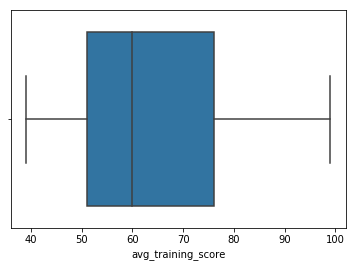

In [19]:
#using seaborns to using 
import seaborn as sns
sns.boxplot(x=data['avg_training_score'])
df_clean=data[data['avg_training_score'].between(0,0.8)]
df_clean.shape

(0, 13)

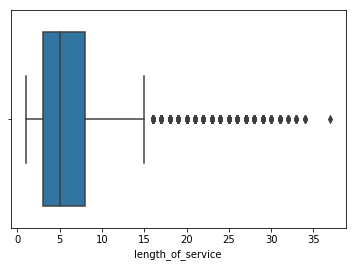

In [20]:
#using seaborns to using 
import seaborn as sns
sns.boxplot(x=data['length_of_service'])
df_clean=data[data['length_of_service'].between(0,0.8)]
df_clean.shape


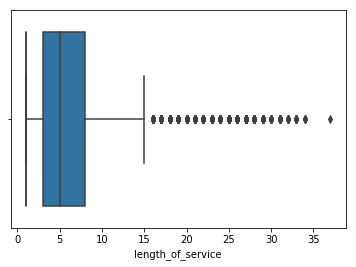

In [21]:
#using seaborns to using 
import seaborn as sns
sns.boxplot(x=data['length_of_service'])
df_clean=data[data['length_of_service'].between(0,1.5)]
df_clean.shape
sns.boxplot(x=df_clean['length_of_service'])

In [22]:
#data changing objects to int convertion using label encoder
data.info()#

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 13 columns):
employee_id             48660 non-null int64
department              48660 non-null object
region                  48660 non-null object
education               48660 non-null object
gender                  48660 non-null object
recruitment_channel     48660 non-null object
no_of_trainings         48660 non-null int64
age                     48660 non-null int64
previous_year_rating    48660 non-null float64
length_of_service       48660 non-null int64
awards_won?             48660 non-null int64
avg_training_score      48660 non-null int64
Outcome                 48660 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 5.2+ MB


In [23]:
#data.education

In [24]:
from sklearn.preprocessing import LabelEncoder
#im=Imputer(missing_values="NaN",strategy="mean",axis=0)

im=LabelEncoder()
data["department"]=im.fit_transform(data[["department"]])
data["region"]=im.fit_transform(data[["region"]])
data["education"]=im.fit_transform(data[["education"]])
data["gender"]=im.fit_transform(data[["gender"]])
data["recruitment_channel"]=im.fit_transform(data[["recruitment_channel"]])


C:\Users\purus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\purus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\purus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\purus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [25]:
data['Outcome'].unique()

array([0, 1], dtype=int64)

In [26]:
data['department'].unique()

array([7, 4, 8, 0, 6, 5, 1, 2, 3], dtype=int64)

In [27]:
data['region'].unique()

array([31, 14, 10, 15, 18, 11, 12, 27,  0, 28, 21, 24,  6,  5,  2, 29, 20,
        8,  4,  7, 17,  1, 19, 23,  3, 13, 25, 30, 26, 32, 16, 22, 33,  9],
      dtype=int64)

In [28]:
data['education'].unique()

array([2, 0, 1], dtype=int64)

In [29]:
data['gender'].unique()

array([0, 1], dtype=int64)

In [30]:
data['recruitment_channel'].unique()

array([2, 0, 1], dtype=int64)

In [31]:
#print(data)

In [32]:
#feature selections
x=data[['employee_id','department','region','education','gender','recruitment_channel','no_of_trainings','age','previous_year_rating','length_of_service','awards_won?','avg_training_score']]
y=data['Outcome']

In [33]:
y=x.to_csv("employees.csv",index=False)

In [34]:
#clustring
from sklearn.cluster import KMeans
#create cluster
kmeans = KMeans(n_clusters=2)
s=kmeans.fit(x)
y_pred = s.predict(x)

In [35]:
#cluster output
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [36]:
len(y_pred)

48660

In [37]:
#both of same
data.shape

(48660, 13)

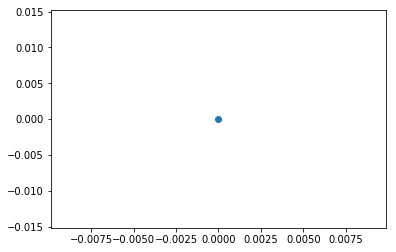

In [39]:
#scatter plot
import matplotlib.pyplot as plt
plt.scatter(y_pred[0],y_pred[1])
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})

In [40]:
#clustring
#from sklearn.cluster import KMeans
#create cluster
#kmeans = KMeans(n_clusters=2)
#s=kmeans.fit(x)
#y_pred = s.predict([[1,5,65,7,3,8,34,22,6,7,8,4]])

In [ ]:
#y_pred

In [42]:
#for heart dieases training set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y_pred,test_size=0.2)

C:\Users\purus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.44944513, 0.54944513, 0.64944513, 0.74944513, 0.84944513,
        0.94944513, 1.04944513, 1.14944513, 1.24944513, 1.34944513,
        1.44944513]),
 <a list of 10 Patch objects>)

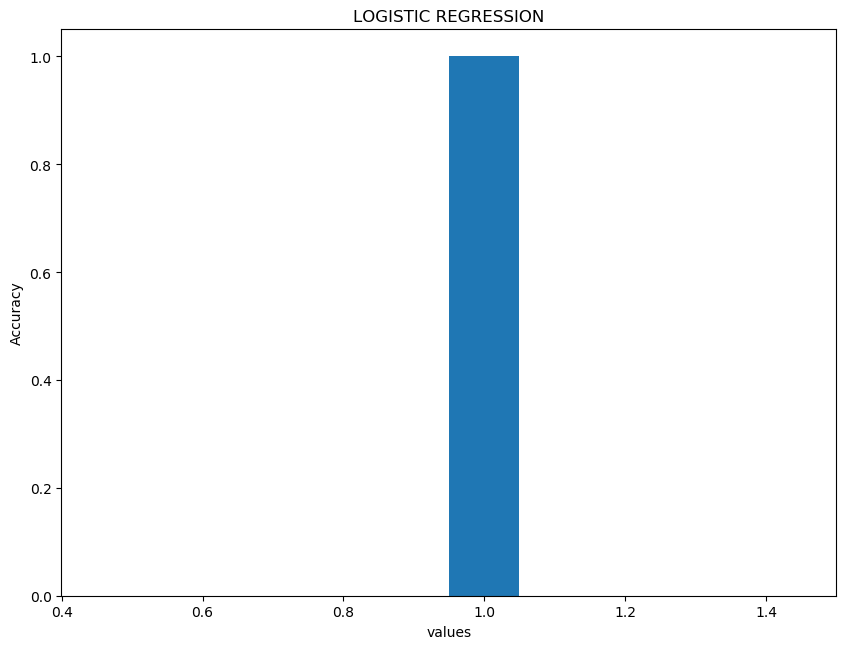

In [44]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.predict(x_test)
l=lg.score(x_test,y_test)
l

import matplotlib.pyplot as plt
plt.title("LOGISTIC REGRESSION")
plt.xlabel('values')
plt.ylabel('Accuracy')
plt.hist(l)

0.9989724619810934


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.49897246, 0.59897246, 0.69897246, 0.79897246, 0.89897246,
        0.99897246, 1.09897246, 1.19897246, 1.29897246, 1.39897246,
        1.49897246]),
 <a list of 10 Patch objects>)

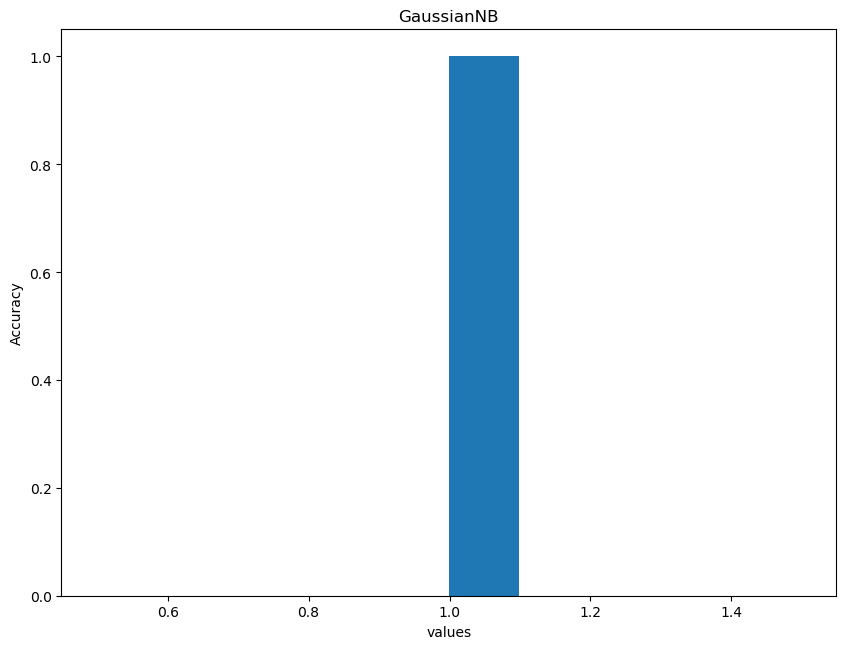

In [45]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train,y_train)
pr=gb.predict(x_test)
g=gb.score(x_test,y_test)
print(g)

import matplotlib.pyplot as plt
plt.title("GaussianNB")
plt.xlabel('values')
plt.ylabel('Accuracy')
plt.hist(g)

In [46]:
from sklearn.ensemble import RandomForestClassifier
R=RandomForestClassifier(max_features='auto', n_estimators=200)
R.fit(x_train,y_train)
pred=R.predict(x_test)
a=R.score(x_test,y_test)
b=R.score(x_test,pred)
print(a)
print(b)

1.0
1.0


In [47]:
#multi model 
from sklearn.ensemble import AdaBoostClassifier
R=AdaBoostClassifier()
R.fit(x_train,y_train)
pred=R.predict(x_test)
a=R.score(x_test,y_test)
print(a)

1.0


In [ ]:
#data['education'].unique()
#array(["2.Master's & above", "0.Bachelor's", nan, '1.Below Secondary']

#data['gender'].unique()
#array([0, 1], dtype=int64)

#data['recruitment_channel'].unique()
#array(['2.sourcing', '0.other', '1.referred'], dtype=object)

#data['department'].unique()
#array(['7.Sales & Marketing', '4.Operations', '8.Technology', '0.Analytics',
       #'6.R&D', '5.Procurement', '1.Finance', '2.HR', '3.Legal'], dtype=object)
    
#data['region'].unique()
#array([31, 14, 10, 15, 18, 11, 12, 27,  0, 28, 21, 24,  6,  5,  2, 29, 20,
        #8,  4,  7, 17,  1, 19, 23,  3, 13, 25, 30, 26, 32, 16, 22, 33,  9]
    
    
#da['employee_id'].unique()
#array([65438, 65141,  7513, ..., 13918, 13614, 51526], dtype=int64)

#data['no_of_trainings'].unique()
#array([ 1,  2,  3,  4,  7,  5,  6, 10,  8,  9], dtype=int64)

#data['age'].unique()
#array([ 1,  2,  3,  4,  7,  5,  6, 10,  8,  9], dtype=int64)


#data['previous_year_rating'].unique()
#array([5., 3., 1., 4., 2.])




In [ ]:
#this is using generate the pickle file
import pickle
with open("emp.h5","wb") as f:
    pickle.dump(R,f)

In [49]:
a=float(input("Enter the employee_id:13918  to 65438 "))
b=float(input("Enter the department : 0 to 7 "))
c=float(input("Enter the region 1 to 33 : "))
d=float(input("Enter the education 0 to 2:"))
e=float(input("Enter the gender 0 or 1 :"))
f=float(input("Enter the recruitment_channel 0 to 2 :"))
g=float(input("Enter the no_of_trainings 1 to 10"))
h=float(input("Enter the age 20 to 58: "))
i=float(input("Enter the previous_year_rating:1 to 5 "))
j=float(input("Enter the length_of_service : 1 to27 "))
k=float(input("Enter the awards_won :0 and 1"))
l=float(input("Enter the avg_training_score :41 to 99"))
r=R.predict([[a,b,c,d,e,f,g,h,i,j,k,l]])

if r[0]==1:
    print("posting")
else:
    print("not posting")

Enter the employee_id:13918  to 65438 1432
Enter the department : 0 to 7 3
Enter the region 1 to 33 : 23
Enter the education 0 to 2:1
Enter the gender 0 or 1 :0
Enter the recruitment_channel 0 to 2 :2
Enter the no_of_trainings 1 to 104
Enter the age 20 to 58: 55
Enter the previous_year_rating:1 to 5 3
Enter the length_of_service : 1 to27 22
Enter the awards_won :0 and 11
Enter the avg_training_score :41 to 9966
posting


In [ ]:
#recheck the pickle files
sm2=SVC()
with open("emp.h5","rb")as f2:
    sm2=pickle.load(f2)

In [ ]:
a=float(input("Enter the employee_id:13918  to 65438 "))
b=float(input("Enter the department : 0 to 7 "))
c=float(input("Enter the region 1 to 33 : "))
d=float(input("Enter the education 0 to 2:"))
e=float(input("Enter the gender 0 or 1 :"))
f=float(input("Enter the recruitment_channel 0 to 2 :"))
g=float(input("Enter the no_of_trainings 1 to 10"))
h=float(input("Enter the age 20 to 58: "))
i=float(input("Enter the previous_year_rating:1 to 5 "))
j=float(input("Enter the length_of_service : 1 to27 "))
k=float(input("Enter the awards_won :0 and 1"))
l=float(input("Enter the avg_training_score :41 to 99"))

r=sm2.predict([[a,b,c,d,e,f,g,h,i,j,k,l]])

if r[0]==1:
    print("posting")
else:
    print("not posting")